## unweighted network

In [163]:
# import all the necessary libraries
import os
import sys
import time
import json
import requests
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

In [164]:
#read the London tube network graphml file 
G = nx.read_graphml('Data/london_updated.graphml')
od_flow = pd.read_csv('Data/London_flows.csv')

In [165]:
# 转换每个节点的 'coords' 属性，从字符串到元组
for node, data in G.nodes(data=True):
    # 移除字符串中的括号并分割
    coords_str = data['coords'].strip("()")  # 移除开头和结尾的括号
    # 将分割后的字符串转换为浮点数，并组成元组
    data['coords'] = tuple(map(float, coords_str.split(',')))

In [166]:
# check
is_connected = nx.is_connected(G)
print(f"该无向图是否完全连通：{is_connected}")

该无向图是否完全连通：True


In [167]:
# check each node and edge's attributes
G.nodes(data=True)

NodeDataView({'Uxbridge': {'coords': (505605.79164161877, 184156.71191985445)}, 'Hillingdon': {'coords': (507544.8588852762, 185008.64550515497)}, 'Ickenham': {'coords': (508089.8084796285, 185937.75443791418)}, 'Ruislip': {'coords': (509483.21437480004, 187013.5122156188)}, 'Ruislip Manor': {'coords': (510118.87368717283, 187242.51348855183)}, 'Eastcote': {'coords': (511171.9715447873, 187632.66808651615)}, 'Rayners Lane': {'coords': (512962.74657874956, 187514.3152906038)}, 'West Harrow': {'coords': (514165.9648772987, 188008.84933260124)}, 'Aldgate': {'coords': (533621.7562325703, 181218.2914789415)}, 'Liverpool Street': {'coords': (533125.9616962055, 181621.10750174103)}, 'Baker Street': {'coords': (528061.608007069, 182010.30083781155)}, 'Great Portland Street': {'coords': (528861.9287262575, 182179.18421714084)}, 'Euston Square': {'coords': (529438.4920540017, 182399.39466041088)}, "King's Cross St. Pancras": {'coords': (530297.7937314082, 182968.91621423292)}, 'Farringdon': {'co

In [204]:
G.edges(data=True)

EdgeDataView([('Uxbridge', 'Hillingdon', {'length': 2144.402930418031, 'line_name': 'Piccadilly', 'flows': 7080}), ('Hillingdon', 'Ickenham', {'length': 1124.4305849099487, 'line_name': 'Piccadilly', 'flows': 8453}), ('Ickenham', 'Ruislip', {'length': 1785.6578668965587, 'line_name': 'Piccadilly', 'flows': 8984}), ('Ruislip', 'Ruislip Manor', {'length': 678.8812931512366, 'line_name': 'Piccadilly', 'flows': 9700}), ('Ruislip Manor', 'Eastcote', {'length': 1126.2177218801535, 'line_name': 'Piccadilly', 'flows': 10497}), ('Eastcote', 'Rayners Lane', {'length': 1819.3170235048165, 'line_name': 'Piccadilly', 'flows': 12414}), ('Rayners Lane', 'West Harrow', {'length': 1364.0797888709, 'line_name': 'Metropolitan', 'flows': 13802}), ('Rayners Lane', 'South Harrow', {'length': 1805.5287510484027, 'line_name': 'Piccadilly', 'flows': 5272}), ('West Harrow', 'Harrow-on-the-Hill', {'length': 1241.8463391204273, 'line_name': 'Metropolitan', 'flows': 14433}), ('Aldgate', 'Liverpool Street', {'lengt

### Centrality

In [168]:
# extract nodes' name and measurement from the network
stations = list(G.nodes())
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
information_centrality = nx.information_centrality(G)
h_closeness_centrality = nx.harmonic_centrality(G)


centrality_df = pd.DataFrame({
    'Station': stations,
    'degree centrality': list(degree_centrality.values()),
    'betweenness centrality': list(betweenness_centrality.values()),
    'closeness_centrality': list(closeness_centrality.values()),
    'infomation_centrality': list(information_centrality.values()),
    'harmonic_closeness': list(h_closeness_centrality.values())
})


In [169]:
centrality_df.head(5)

,Station,degree centrality,betweenness centrality,closeness_centrality,infomation_centrality,harmonic_closeness
0,Uxbridge,0.0025,0.000000,0.049170,0.000190,33.574174
1,Hillingdon,0.0050,0.005000,0.051706,0.000205,57.160825
2,Ickenham,0.0050,0.009975,0.054503,0.000224,37.704710
3,Ruislip,0.0050,0.014925,0.057604,0.000245,44.066858
4,Ruislip Manor,0.0050,0.019850,0.061059,0.000271,36.569581


In [170]:
# save the centrality measures to a csv file
#centrality_df.to_csv('Data/centrality_measures_updated.csv', index=False)

In [171]:
# add each station's attributes from dataframe 'centrality_df' to the each node in G graph, so that we can use these attributes to plot the network
for i in range(len(centrality_df)):
    G.nodes[centrality_df['Station'][i]]['degree centrality'] = centrality_df['degree centrality'][i]
    G.nodes[centrality_df['Station'][i]]['betweenness centrality'] = centrality_df['betweenness centrality'][i]
    G.nodes[centrality_df['Station'][i]]['closeness_centrality'] = centrality_df['closeness_centrality'][i]
    G.nodes[centrality_df['Station'][i]]['infomation_centrality'] = centrality_df['infomation_centrality'][i]


In [172]:
G.nodes(data=True)

NodeDataView({'Uxbridge': {'coords': (505605.79164161877, 184156.71191985445), 'degree centrality': 0.0025, 'betweenness centrality': 0.0, 'closeness_centrality': 0.049170251997541485, 'infomation_centrality': 0.00018977426349963656}, 'Hillingdon': {'coords': (507544.8588852762, 185008.64550515497), 'degree centrality': 0.005, 'betweenness centrality': 0.005, 'closeness_centrality': 0.05170630816959669, 'infomation_centrality': 0.00020532116821793435}, 'Ickenham': {'coords': (508089.8084796285, 185937.75443791418), 'degree centrality': 0.005, 'betweenness centrality': 0.009974937343358397, 'closeness_centrality': 0.054503338329472684, 'infomation_centrality': 0.00022354269281126763}, 'Ruislip': {'coords': (509483.21437480004, 187013.5122156188), 'degree centrality': 0.005, 'betweenness centrality': 0.014924812030075188, 'closeness_centrality': 0.0576036866359447, 'infomation_centrality': 0.00024519308630603285}, 'Ruislip Manor': {'coords': (510118.87368717283, 187242.51348855183), 'deg

In [173]:
# save the 'coord' attribute of each node to a dictionary
pos = nx.get_node_attributes(G, 'coords')

### Plotting

In [174]:
# map the harmonic_closeness centrality to the color of the nodes
# standardize the harmonic_closeness centrality values to [0, 1] interval
"""
min_value = min(h_closeness_centrality.values())
max_value = max(h_closeness_centrality.values())
norm_value = [(G.nodes[node]['harmonic_closeness'] - min_value) / (max_value - min_value) for node in G.nodes()]

colors = plt.cm.viridis_r(norm_value)  

plt.figure(figsize=(8, 5))
nx.draw(G, pos=pos, with_labels=False, node_size=30, font_size=5, node_color=colors, alpha=0.7)

plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Harmonic Closeness Centrality After Standardization', shrink=0.7, pad=-0.05)
plt.axis('off')
plt.title('Network with Harmonic Closeness Centrality as Colors', fontsize=12)
# set the resolution of the plot
plt.savefig('Images/network_closeness.png', dpi=150)
plt.show()
"""

"\nmin_value = min(h_closeness_centrality.values())\nmax_value = max(h_closeness_centrality.values())\nnorm_value = [(G.nodes[node]['harmonic_closeness'] - min_value) / (max_value - min_value) for node in G.nodes()]\n\ncolors = plt.cm.viridis_r(norm_value)  \n\nplt.figure(figsize=(8, 5))\nnx.draw(G, pos=pos, with_labels=False, node_size=30, font_size=5, node_color=colors, alpha=0.7)\n\nplt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Harmonic Closeness Centrality After Standardization', shrink=0.7, pad=-0.05)\nplt.axis('off')\nplt.title('Network with Harmonic Closeness Centrality as Colors', fontsize=12)\n# set the resolution of the plot\nplt.savefig('Images/network_closeness.png', dpi=150)\nplt.show()\n"

C:\Users\SBH\AppData\Local\Temp\ipykernel_35236\4242422132.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Closeness Centrality After Standardization', shrink=0.7, pad=-0.05)


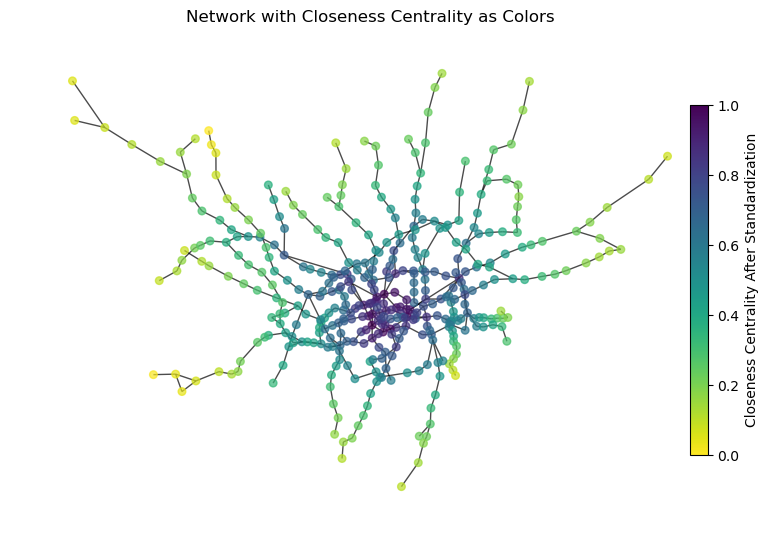

In [175]:
# map the closeness centrality to the color of the nodes
# standardize the closeness centrality values to [0, 1] interval
min_value = min(closeness_centrality.values())
max_value = max(closeness_centrality.values())
norm_value = [(G.nodes[node]['closeness_centrality'] - min_value) / (max_value - min_value) for node in G.nodes()]

colors = plt.cm.viridis_r(norm_value)  

plt.figure(figsize=(8, 5))
nx.draw(G, pos=pos, with_labels=False, node_size=30, font_size=5, node_color=colors, alpha=0.7)

plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Closeness Centrality After Standardization', shrink=0.7, pad=-0.05)
plt.axis('off')
plt.title('Network with Closeness Centrality as Colors', fontsize=12)
# set the resolution of the plot
plt.savefig('Images/network_closeness2.png', dpi=150)
plt.show()

C:\Users\SBH\AppData\Local\Temp\ipykernel_35236\2707923522.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Betweenness Centrality After Standardization', shrink=0.7, pad=-0.05)


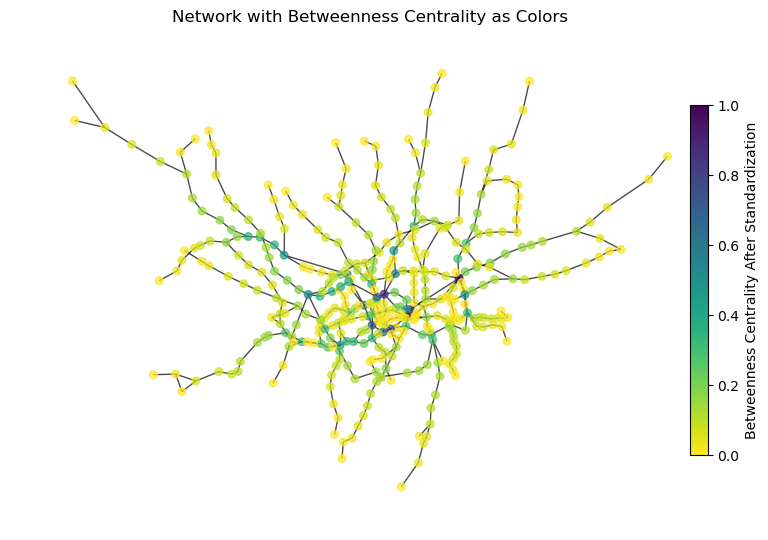

In [176]:
# map the betweenness centrality to the color of the nodes
# standardize the betweenness centrality values to [0, 1] interval
min_value = min(betweenness_centrality.values())
max_value = max(betweenness_centrality.values())
norm_value = [(G.nodes[node]['betweenness centrality'] - min_value) / (max_value - min_value) for node in G.nodes()]

colors = plt.cm.viridis_r(norm_value)

plt.figure(figsize=(8, 5))
nx.draw(G, pos=pos, with_labels=False, node_size=30, font_size=5, node_color=colors, alpha=0.7)

plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Betweenness Centrality After Standardization', shrink=0.7, pad=-0.05)
plt.axis('off')
plt.title('Network with Betweenness Centrality as Colors', fontsize=12)
# set the resolution of the plot
plt.savefig('Images/network_betweenness.png', dpi=150)
plt.show()

C:\Users\SBH\AppData\Local\Temp\ipykernel_35236\2514499113.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Information Centrality After Standardization', shrink=0.7, pad=-0.05)


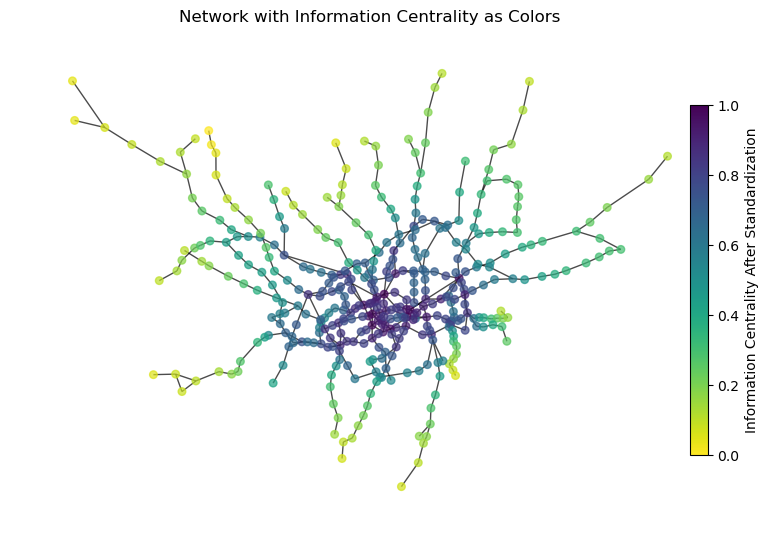

In [177]:
# map the information centrality to the color of the nodes
# standardize the information centrality values to [0, 1] interval
min_value = min(information_centrality.values())
max_value = max(information_centrality.values())
norm_value = [(G.nodes[node]['infomation_centrality'] - min_value) / (max_value - min_value) for node in G.nodes()]

colors = plt.cm.viridis_r(norm_value)

plt.figure(figsize=(8, 5))
nx.draw(G, pos=pos, with_labels=False, node_size=30, font_size=5, node_color=colors, alpha=0.7)

plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Information Centrality After Standardization', shrink=0.7, pad=-0.05)
plt.axis('off')
plt.title('Network with Information Centrality as Colors', fontsize=12)

# set the resolution of the plot
plt.savefig('Images/network_information.png', dpi=150)

plt.show()

### Global Measures

In [178]:

# 计算全局效率
global_eff = nx.global_efficiency(G)
print(f"Global Efficiency: {global_eff}")

# 计算模块度 (使用greedy_modularity_communities)
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G)
# 如果使用python-louvain库
# import community as community_louvain
# partition = community_louvain.best_partition(G)
# modularity = community_louvain.modularity(partition, G)

modularity = community.modularity(G, communities)
print(f"Modularity: {modularity}")

Global Efficiency: 0.10125619359721513
Modularity: 0.8302138117924331


### Non-sequencial Removal

In [179]:
#create a copy of G graph
G_non_removal = G.copy()
G_seq_removal = G.copy()

In [180]:
# 计算需要移除的节点数量（70%）
# calculate the number of nodes to remove (70%)
num_nodes_to_remove = int(len(G_non_removal.nodes) * 0.7)
num_nodes_to_remove_50 = int(len(G_non_removal.nodes) * 0.5)


**Closeness Centrality**

In [181]:
G_non_removal = G.copy()

# Step 1: 计算所有节点的中介中心性
closeness_centrality = nx.closeness_centrality(G_non_removal)

# 准备数据框架，存储每步的结果
results = []

# 获取并按中介中心性降序排序节点
sorted_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

for i in range(num_nodes_to_remove):
    node, centrality_value = sorted_nodes[i]
    # 移除节点
    G_non_removal.remove_node(node)
    
    # 计算全局效率
    global_eff = nx.global_efficiency(G_non_removal)
    
    # 计算模块性
    communities = community.greedy_modularity_communities(G_non_removal)
    modularity = community.modularity(G_non_removal, communities)
    
    # 将结果存储到列表中
    results.append({'Closeness Removed Node': node, 
                    'Closeness Centrality': centrality_value, 
                    'Closeness Global Efficiency': global_eff, 
                    'Closeness Modularity': modularity})

# 将列表转换为DataFrame
DF_nonseq_closeness = pd.DataFrame(results)

In [182]:
G_non_removal = G.copy()
# Step 1: 计算所有节点的closeness中心性
closeness_centrality2 = nx.closeness_centrality(G_non_removal)

# Step 2: 对节点按中介中心性值降序排序，并获取前十个节点
top_10_nodes = sorted(closeness_centrality2.items(), key=lambda x: x[1], reverse=True)[:10]

# Step 3: 遍历前十个节点，依次移除并计算全局效率和模块性

for node, centrality_value in top_10_nodes:
    # 移除节点
    G_non_removal.remove_node(node)
    
    # 计算全局效率
    global_eff = nx.global_efficiency(G_non_removal)
    
    # 计算模块性
    communities = community.greedy_modularity_communities(G_non_removal)
    modularity = community.modularity(G_non_removal, communities)
    
    # 打印结果
    print(f"After removing node {node}:")
    print(f"Harmonic Closeness Centrality of removed node: {centrality_value}")
    print(f"Global Efficiency: {global_eff}")
    print(f"Modularity: {modularity}")
    print("\n")

After removing node Green Park:
Harmonic Closeness Centrality of removed node: 0.11477761836441894
Global Efficiency: 0.09918991960788821
Modularity: 0.8340258139195655


After removing node Bank and Monument:
Harmonic Closeness Centrality of removed node: 0.1135718341851221
Global Efficiency: 0.09487232544791604
Modularity: 0.8438762432446918


After removing node King's Cross St. Pancras:
Harmonic Closeness Centrality of removed node: 0.11344299489506524
Global Efficiency: 0.08793385149141308
Modularity: 0.8501679100725935


After removing node Westminster:
Harmonic Closeness Centrality of removed node: 0.11254924029262803
Global Efficiency: 0.08737164566977171
Modularity: 0.8485775723697958


After removing node Waterloo:
Harmonic Closeness Centrality of removed node: 0.11226494527083918
Global Efficiency: 0.08485943799790521
Modularity: 0.8501953601320046


After removing node Oxford Circus:
Harmonic Closeness Centrality of removed node: 0.11120378092855157
Global Efficiency: 0.082

**Betweenness Centrality**

In [183]:
G_non_removal = G.copy()

# Step 1: 计算所有节点的中介中心性
betweenness_centrality = nx.betweenness_centrality(G_non_removal)

# 准备数据框架，存储每步的结果
results = []

# 获取并按中介中心性降序排序节点
sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

for i in range(num_nodes_to_remove):
    node, centrality_value = sorted_nodes[i]
    # 移除节点
    G_non_removal.remove_node(node)
    
    # 计算全局效率
    global_eff = nx.global_efficiency(G_non_removal)
    
    # 计算模块性
    communities = community.greedy_modularity_communities(G_non_removal)
    modularity = community.modularity(G_non_removal, communities)
    
    # 将结果存储到列表中
    results.append({'Betweenness Removed Node': node, 
                    'Betweenness Centrality': centrality_value, 
                    'Betweenness Global Efficiency': global_eff, 
                    'Betweenness Modularity': modularity})

# 将列表转换为DataFrame
DF_nonseq_between = pd.DataFrame(results)

In [184]:
G_non_removal = G.copy()
# Step 1: 计算所有节点的中介中心性
betweenness_centrality = nx.betweenness_centrality(G_non_removal)

# Step 2: 对节点按中介中心性值降序排序，并获取前十个节点
top_10_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Step 3: 遍历前十个节点，依次移除并计算全局效率和模块性
for node, centrality_value in top_10_nodes:
    # 移除节点
    G_non_removal.remove_node(node)
    
    # 计算全局效率
    global_eff = nx.global_efficiency(G_non_removal)
    
    # 计算模块性
    communities = community.greedy_modularity_communities(G_non_removal)
    modularity = community.modularity(G_non_removal, communities)
    
    # 打印结果
    print(f"After removing node {node}:")
    print(f"Betweenness Centrality of removed node: {centrality_value}")
    print(f"Global Efficiency: {global_eff}")
    print(f"Modularity: {modularity}")
    print("\n")

After removing node Stratford:
Betweenness Centrality of removed node: 0.2978457823852558
Global Efficiency: 0.0889173606651109
Modularity: 0.8357129917431018


After removing node Bank and Monument:
Betweenness Centrality of removed node: 0.29048946048382174
Global Efficiency: 0.08586164448742514
Modularity: 0.8467604938271602


After removing node Liverpool Street:
Betweenness Centrality of removed node: 0.2708068552514043
Global Efficiency: 0.0849634926642405
Modularity: 0.8521436184117916


After removing node King's Cross St. Pancras:
Betweenness Centrality of removed node: 0.2553072865243917
Global Efficiency: 0.07849775440713926
Modularity: 0.8531685701091215


After removing node Waterloo:
Betweenness Centrality of removed node: 0.24392083111819995
Global Efficiency: 0.07594226578367465
Modularity: 0.8595054046592623


After removing node Green Park:
Betweenness Centrality of removed node: 0.2158348635839238
Global Efficiency: 0.07415154167649804
Modularity: 0.8598785920167699


**Information Centrality**

In [185]:
G_non_removal = G.copy()

# Step 1: 计算所有节点的中介中心性
information_centrality = nx.information_centrality(G_non_removal)

# 准备数据框架，存储每步的结果
results = []

# 获取并按中介中心性降序排序节点
sorted_nodes = sorted(information_centrality.items(), key=lambda x: x[1], reverse=True)

for i in range(num_nodes_to_remove):
    node, centrality_value = sorted_nodes[i]
    # 移除节点
    G_non_removal.remove_node(node)
    
    # 计算全局效率
    global_eff = nx.global_efficiency(G_non_removal)
    
    # 计算模块性
    communities = community.greedy_modularity_communities(G_non_removal)
    modularity = community.modularity(G_non_removal, communities)
    
    # 将结果存储到列表中
    results.append({'Information Removed Node': node, 
                    'Information Centrality': centrality_value, 
                    'Information Global Efficiency': global_eff, 
                    'Information Modularity': modularity})

# 将列表转换为DataFrame
DF_nonseq_information = pd.DataFrame(results)

In [186]:
G_non_removal = G.copy()
# Step 1: 计算所有节点的information中心性
information_centrality2 = nx.information_centrality(G_non_removal)

# Step 2: 对节点按information中心性值降序排序，并获取前十个节点
top_10_nodes = sorted(information_centrality2.items(), key=lambda x: x[1], reverse=True)[:10]

# Step 3: 遍历前十个节点，依次移除并计算全局效率和模块性

for node, centrality_value in top_10_nodes:
    # 移除节点
    G_non_removal.remove_node(node)
    
    # 计算全局效率
    global_eff = nx.global_efficiency(G_non_removal)
    
    # 计算模块性
    communities = community.greedy_modularity_communities(G_non_removal)
    modularity = community.modularity(G_non_removal, communities)
    
    # 打印结果
    print(f"After removing node {node}:")
    print(f"Information Centrality of removed node: {centrality_value}")
    print(f"Global Efficiency: {global_eff}")
    print(f"Modularity: {modularity}")
    print("\n")

After removing node Bank and Monument:
Information Centrality of removed node: 0.0005983266677737467
Global Efficiency: 0.09673475608480939
Modularity: 0.8379801690707751


After removing node King's Cross St. Pancras:
Information Centrality of removed node: 0.0005905597144871251
Global Efficiency: 0.08988328856364358
Modularity: 0.8455096327042055


After removing node Liverpool Street:
Information Centrality of removed node: 0.000586523134030409
Global Efficiency: 0.08744013054717219
Modularity: 0.8488481499832343


After removing node Oxford Circus:
Information Centrality of removed node: 0.0005861846943210985
Global Efficiency: 0.08598271109653323
Modularity: 0.857685326587173


After removing node Green Park:
Information Centrality of removed node: 0.000584678376721728
Global Efficiency: 0.08309865159509316
Modularity: 0.8549706464102348


After removing node Waterloo:
Information Centrality of removed node: 0.0005787504023887102
Global Efficiency: 0.08113616748843225
Modularity: 

**plotting**

In [187]:
# concat the DF_nonseq_closeness, DF_nonseq_between, DF_nonseq_information dataframes as a single dataframe
DF_nonseq = pd.concat([DF_nonseq_closeness, DF_nonseq_between, DF_nonseq_information], axis=1)
DF_nonseq['Removing Proportion'] = DF_nonseq.index / len(G_non_removal.nodes) * 100
DF_nonseq.head(5)

,Closeness Removed Node,Closeness Centrality,Closeness Global Efficiency,Closeness Modularity,Betweenness Removed Node,Betweenness Centrality,Betweenness Global Efficiency,Betweenness Modularity,Information Removed Node,Information Centrality,Information Global Efficiency,Information Modularity,Removing Proportion
0,Green Park,0.114778,0.099190,0.834026,Stratford,0.297846,0.088917,0.835713,Bank and Monument,0.000598,0.096735,0.837980,0.000000
1,Bank and Monument,0.113572,0.094872,0.843876,Bank and Monument,0.290489,0.085862,0.846760,King's Cross St. Pancras,0.000591,0.089883,0.845510,0.255754
2,King's Cross St. Pancras,0.113443,0.087934,0.850168,Liverpool Street,0.270807,0.084963,0.852144,Liverpool Street,0.000587,0.087440,0.848848,0.511509
3,Westminster,0.112549,0.087372,0.848578,King's Cross St. Pancras,0.255307,0.078498,0.853169,Oxford Circus,0.000586,0.085983,0.857685,0.767263
4,Waterloo,0.112265,0.084859,0.850195,Waterloo,0.243921,0.075942,0.859505,Green Park,0.000585,0.083099,0.854971,1.023018


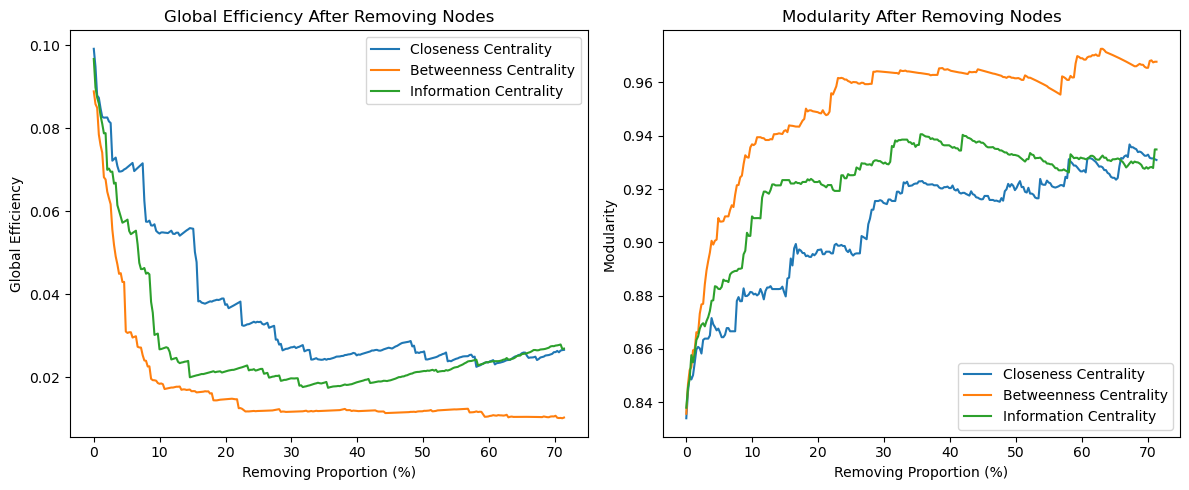

In [188]:
# create a subplots, and plot the global efficiency and modularity after removing nodes based on closeness, betweenness and information centrality. global efficiency is on the left one , and another plot for modularity

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# plot the global efficiency
ax[0].plot(DF_nonseq['Removing Proportion'], DF_nonseq['Closeness Global Efficiency'], label='Closeness Centrality')
ax[0].plot(DF_nonseq['Removing Proportion'], DF_nonseq['Betweenness Global Efficiency'], label='Betweenness Centrality')
ax[0].plot(DF_nonseq['Removing Proportion'], DF_nonseq['Information Global Efficiency'], label='Information Centrality')
ax[0].set_xlabel('Removing Proportion (%)')
ax[0].set_ylabel('Global Efficiency')
ax[0].set_title('Global Efficiency After Removing Nodes')
ax[0].legend()

# plot the modularity
ax[1].plot(DF_nonseq['Removing Proportion'], DF_nonseq['Closeness Modularity'], label='Closeness Centrality')
ax[1].plot(DF_nonseq['Removing Proportion'], DF_nonseq['Betweenness Modularity'], label='Betweenness Centrality')
ax[1].plot(DF_nonseq['Removing Proportion'], DF_nonseq['Information Modularity'], label='Information Centrality')
ax[1].set_xlabel('Removing Proportion (%)')
ax[1].set_ylabel('Modularity')
ax[1].set_title('Modularity After Removing Nodes')
ax[1].legend()

plt.tight_layout()
plt.savefig('Images/Nonseq_ImpactMeasures.png', dpi=150)
plt.show()


### Sequetial Removal

**Closeness Centrality**

In [189]:
G_seq_removal = G.copy()

# 准备数据框架，存储每步的结果
results = []

for i in range(num_nodes_to_remove_50):
    # calculate the closeness centrality of each node
    closeness_centrality = nx.closeness_centrality(G_seq_removal)
    # sort the dictionary by values in descending order
    sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True))
    # get the first key in the dictionary
    node_to_remove = list(sorted_closeness.keys())[0]
    # save the node's name and the closeness centrality value of the node to remove
    centrality_value = sorted_closeness[node_to_remove]
    # remove the node from the graph
    G_seq_removal.remove_node(node_to_remove)
    # calculate the global efficiency
    global_eff = nx.global_efficiency(G_seq_removal)
    # calculate the modularity
    communities = community.greedy_modularity_communities(G_seq_removal)
    modularity = community.modularity(G_seq_removal, communities)
    # 将结果存储到列表中
    results.append({'Closeness Removed Node': node_to_remove, 
                    'Closeness Centrality': centrality_value, 
                    'Closeness Global Efficiency': global_eff, 
                    'Closeness Modularity': modularity})

# 将列表转换为DataFrame
DF_sequen_closeness = pd.DataFrame(results)


In [190]:
G_seq_removal = G.copy()
# remove the top 10 nodes with highest closeness centrality, after each removal, calculate the global efficiency and modularity and print the results
# also print the removed nodes' name and closeness centrality value after each removal
for i in range(10):
    # calculate the closeness centrality of each node
    closeness_centrality = nx.closeness_centrality(G_seq_removal)
    # sort the dictionary by values in descending order
    sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True))
    # get the first key in the dictionary
    node_to_remove = list(sorted_closeness.keys())[0]
    # remove the node from the graph
    G_seq_removal.remove_node(node_to_remove)
    # calculate the global efficiency
    global_eff = nx.global_efficiency(G_seq_removal)
    # calculate the modularity
    communities = community.greedy_modularity_communities(G_seq_removal)
    modularity = community.modularity(G_seq_removal, communities)
    print(f"After removing node {node_to_remove}:")
    print(f"Closeness Centrality of removed node: {closeness_centrality[node_to_remove]}")
    print(f"Global Efficiency: {global_eff}")
    print(f"Modularity: {modularity}")
    print("\n")
    

After removing node Green Park:
Closeness Centrality of removed node: 0.11477761836441894
Global Efficiency: 0.09918991960788821
Modularity: 0.8340258139195655


After removing node King's Cross St. Pancras:
Closeness Centrality of removed node: 0.11236271472824556
Global Efficiency: 0.09443475025566714
Modularity: 0.842413980477013


After removing node Waterloo:
Closeness Centrality of removed node: 0.1046542203523534
Global Efficiency: 0.09181648060183102
Modularity: 0.8460269850127553


After removing node Bank and Monument:
Closeness Centrality of removed node: 0.09742331288343559
Global Efficiency: 0.0854256306691259
Modularity: 0.8514842066834292


After removing node West Hampstead:
Closeness Centrality of removed node: 0.08173374613003095
Global Efficiency: 0.08054424756502658
Modularity: 0.8546072922830406


After removing node Canada Water:
Closeness Centrality of removed node: 0.07597614925947298
Global Efficiency: 0.05810104159173086
Modularity: 0.8589063891748318


After 

**Betweenness Centrality**

In [191]:
G_seq_removal = G.copy()

# 准备数据框架，存储每步的结果
results = []

for i in range(num_nodes_to_remove_50):
    # calculate the closeness centrality of each node
    betweenness_centrality = nx.betweenness_centrality(G_seq_removal)
    # sort the dictionary by values in descending order
    sorted_betweenness = dict(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True))
    # get the first key in the dictionary
    node_to_remove = list(sorted_betweenness.keys())[0]
    # save the node's name and the closeness centrality value of the node to remove
    centrality_value = sorted_betweenness[node_to_remove]
    # remove the node from the graph
    G_seq_removal.remove_node(node_to_remove)
    # calculate the global efficiency
    global_eff = nx.global_efficiency(G_seq_removal)
    # calculate the modularity
    communities = community.greedy_modularity_communities(G_seq_removal)
    modularity = community.modularity(G_seq_removal, communities)
    # 将结果存储到列表中
    results.append({'Betweenness Removed Node': node_to_remove, 
                    'Betweenness Centrality': centrality_value, 
                    'Betweenness Global Efficiency': global_eff, 
                    'Betweenness Modularity': modularity})

# 将列表转换为DataFrame
DF_sequen_betweenness = pd.DataFrame(results)

In [192]:
G_seq_removal = G.copy()
# remove the top 10 nodes with highest betweenness centrality, after each removal, calculate the global efficiency and modularity and print the results
# also print the removed nodes' name and betweenness centrality value after each removal
for i in range(10):
    # calculate the betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G_seq_removal)
    # sort the dictionary by values in descending order
    sorted_betweenness = dict(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True))
    # get the first key in the dictionary
    node_to_remove = list(sorted_betweenness.keys())[0]
    # remove the node from the graph
    G_seq_removal.remove_node(node_to_remove)
    # calculate the global efficiency
    global_eff = nx.global_efficiency(G_seq_removal)
    # calculate the modularity
    communities = community.greedy_modularity_communities(G_seq_removal)
    modularity = community.modularity(G_seq_removal, communities)
    print(f"After removing node {node_to_remove}:")
    print(f"Betweenness Centrality of removed node: {betweenness_centrality[node_to_remove]}")
    print(f"Global Efficiency: {global_eff}")
    print(f"Modularity: {modularity}")
    
    
    print("\n")

After removing node Stratford:
Betweenness Centrality of removed node: 0.2978457823852558
Global Efficiency: 0.0889173606651109
Modularity: 0.8357129917431018


After removing node King's Cross St. Pancras:
Betweenness Centrality of removed node: 0.2472624217551862
Global Efficiency: 0.08460293133575375
Modularity: 0.8450105948348337


After removing node Waterloo:
Betweenness Centrality of removed node: 0.25417997746403664
Global Efficiency: 0.08182895253293376
Modularity: 0.8564549930564325


After removing node Bank and Monument:
Betweenness Centrality of removed node: 0.21465090713621393
Global Efficiency: 0.07767794342813261
Modularity: 0.8607514438814869


After removing node Canada Water:
Betweenness Centrality of removed node: 0.24490271917487114
Global Efficiency: 0.07283234083472549
Modularity: 0.8642490815264712


After removing node West Hampstead:
Betweenness Centrality of removed node: 0.4568311797721297
Global Efficiency: 0.05321020398402621
Modularity: 0.869824229313142

**Information Centrality**

In [193]:
G_seq_removal = G.copy()

# 准备数据框架，存储每步的结果
results = []

for i in range(num_nodes_to_remove_50):
    if not nx.is_connected(G_seq_removal):
        # 获取最大的连通子图用于计算信息中心性
        largest_cc = max(nx.connected_components(G_seq_removal), key=len)
        G_sub = G_seq_removal.subgraph(largest_cc).copy()
    else:
        G_sub = G_seq_removal.copy()
    # calculate the information centrality of each node
    information_centrality = nx.information_centrality(G_sub)
    # sort the dictionary by values in descending order
    sorted_information = dict(sorted(information_centrality.items(), key=lambda x: x[1], reverse=True))
    # get the first key in the dictionary
    node_to_remove = list(sorted_information.keys())[0]
    # save the node's name and the information centrality value of the node to remove
    centrality_value = sorted_information[node_to_remove]
    # remove the node from the graph
    G_seq_removal.remove_node(node_to_remove)
    # calculate the global efficiency
    global_eff = nx.global_efficiency(G_seq_removal)
    # calculate the modularity
    communities = community.greedy_modularity_communities(G_seq_removal)
    modularity = community.modularity(G_seq_removal, communities)
    # 将结果存储到列表中
    results.append({'Information Removed Node': node_to_remove, 
                    'Information Centrality': centrality_value, 
                    'Information Global Efficiency': global_eff, 
                    'Information Modularity': modularity})
    
# 将列表转换为DataFrame
DF_sequen_information = pd.DataFrame(results)

In [194]:
import networkx as nx
from networkx.algorithms import community

G_seq_removal = G.copy()  # 假设G已经定义

for i in range(10):
    # 检查原图是否连通
    if not nx.is_connected(G_seq_removal):
        # 获取最大的连通子图用于计算信息中心性
        largest_cc = max(nx.connected_components(G_seq_removal), key=len)
        G_sub = G_seq_removal.subgraph(largest_cc).copy()
    else:
        G_sub = G_seq_removal

    # 在适用的图（G_sub）上计算信息中心性
    information_centrality = nx.information_centrality(G_sub)

    # 排序并选择要移除的节点
    node_to_remove = sorted(information_centrality, key=information_centrality.get, reverse=True)[0]

    # 从原图G_seq_removal中移除节点
    G_seq_removal.remove_node(node_to_remove)

    # 计算全局效率（直接在G_seq_removal上计算）
    global_eff = nx.global_efficiency(G_seq_removal)
    
    # 计算模块性（直接在G_seq_removal上计算）
    # 注意：如果图不连通，这里需要处理所有连通分量
    communities = community.greedy_modularity_communities(G_seq_removal)
    modularity = community.modularity(G_seq_removal, communities)

    # 打印结果
    print(f"After removing node {node_to_remove}:")
    print(f"Information Centrality of removed node: {information_centrality.get(node_to_remove, 'N/A')}")
    print(f"Global Efficiency: {global_eff}")
    print(f"Modularity: {modularity}")
    print("\n")



After removing node Bank and Monument:
Information Centrality of removed node: 0.0005983266677737467
Global Efficiency: 0.09673475608480939
Modularity: 0.8379801690707751


After removing node King's Cross St. Pancras:
Information Centrality of removed node: 0.0005692589445887963
Global Efficiency: 0.08988328856364358
Modularity: 0.8455096327042055


After removing node Green Park:
Information Centrality of removed node: 0.0004761247618463016
Global Efficiency: 0.08793385149141308
Modularity: 0.8501679100725935


After removing node Baker Street:
Information Centrality of removed node: 0.00045597370566122794
Global Efficiency: 0.08435536246959809
Modularity: 0.8557655885969877


After removing node Canada Water:
Information Centrality of removed node: 0.0004406794677122221
Global Efficiency: 0.07711329394211024
Modularity: 0.8633029462280354


After removing node West Hampstead:
Information Centrality of removed node: 0.000296513763423299
Global Efficiency: 0.05575098752714152
Modulari

In [195]:


G_seq_removal = G.copy()  # 假设G已经定义

for i in range(10):
    # 检查图是否连通
    if not nx.is_connected(G_seq_removal):
        # 获取最大的连通子图
        largest_cc = max(nx.connected_components(G_seq_removal), key=len)
        G_sub = G_seq_removal.subgraph(largest_cc).copy()
        print(f"Graph is not connected. Using the largest connected component for calculations.")
        print(f"Original graph node count: {len(G_seq_removal.nodes())}")
        print(f"Largest connected component node count: {len(G_sub.nodes())}")
    else:
        G_sub = G_seq_removal
    
    # 计算信息中心性
    information_centrality = nx.information_centrality(G_sub)
    
    # 排序并选择要移除的节点
    node_to_remove = sorted(information_centrality, key=information_centrality.get, reverse=True)[0]
    
    # 移除节点
    G_seq_removal.remove_node(node_to_remove)
    
    # 使用最大连通子图计算全局效率和模块性
    if nx.is_connected(G_seq_removal):
        G_calc = G_seq_removal
    else:
        largest_cc = max(nx.connected_components(G_seq_removal), key=len)
        G_calc = G_seq_removal.subgraph(largest_cc).copy()
    global_eff = nx.global_efficiency(G_calc)
    communities = community.greedy_modularity_communities(G_calc)
    modularity = community.modularity(G_calc, communities)
    
    # 打印结果
    print(f"After removing node {node_to_remove}:")
    print(f"Information Centrality of removed node: {information_centrality[node_to_remove]}")
    print(f"Global Efficiency: {global_eff}")
    print(f"Modularity: {modularity}")
    print("\n")


After removing node Bank and Monument:
Information Centrality of removed node: 0.0005983266677737467
Global Efficiency: 0.09673475608480939
Modularity: 0.8379801690707751


After removing node King's Cross St. Pancras:
Information Centrality of removed node: 0.0005692589445887963
Global Efficiency: 0.08988328856364358
Modularity: 0.8455096327042055


After removing node Green Park:
Information Centrality of removed node: 0.0004761247618463016
Global Efficiency: 0.08793385149141308
Modularity: 0.8501679100725935


After removing node Baker Street:
Information Centrality of removed node: 0.00045597370566122794
Global Efficiency: 0.0851999951459902
Modularity: 0.8570192448030691


Graph is not connected. Using the largest connected component for calculations.
Original graph node count: 397
Largest connected component node count: 395
After removing node Canada Water:
Information Centrality of removed node: 0.0004406794677122221
Global Efficiency: 0.07788624170719102
Modularity: 0.859176240

In [196]:
# concat the DF_sequen_closeness, DF_sequen_betweenness, DF_sequen_information dataframes as a single dataframe

DF_sequen = pd.concat([DF_sequen_closeness, DF_sequen_betweenness, DF_sequen_information], axis=1)
DF_sequen['Removing Proportion'] = DF_sequen.index / len(G_seq_removal.nodes) * 100
DF_sequen.head(5)


,Closeness Removed Node,Closeness Centrality,Closeness Global Efficiency,Closeness Modularity,Betweenness Removed Node,Betweenness Centrality,Betweenness Global Efficiency,Betweenness Modularity,Information Removed Node,Information Centrality,Information Global Efficiency,Information Modularity,Removing Proportion
0,Green Park,0.114778,0.099190,0.834026,Stratford,0.297846,0.088917,0.835713,Bank and Monument,0.000598,0.096735,0.837980,0.000000
1,King's Cross St. Pancras,0.112363,0.094435,0.842414,King's Cross St. Pancras,0.247262,0.084603,0.845011,King's Cross St. Pancras,0.000569,0.089883,0.845510,0.255754
2,Waterloo,0.104654,0.091816,0.846027,Waterloo,0.254180,0.081829,0.856455,Green Park,0.000476,0.087934,0.850168,0.511509
3,Bank and Monument,0.097423,0.085426,0.851484,Bank and Monument,0.214651,0.077678,0.860751,Baker Street,0.000456,0.084355,0.855766,0.767263
4,West Hampstead,0.081734,0.080544,0.854607,Canada Water,0.244903,0.072832,0.864249,Canada Water,0.000441,0.077113,0.863303,1.023018


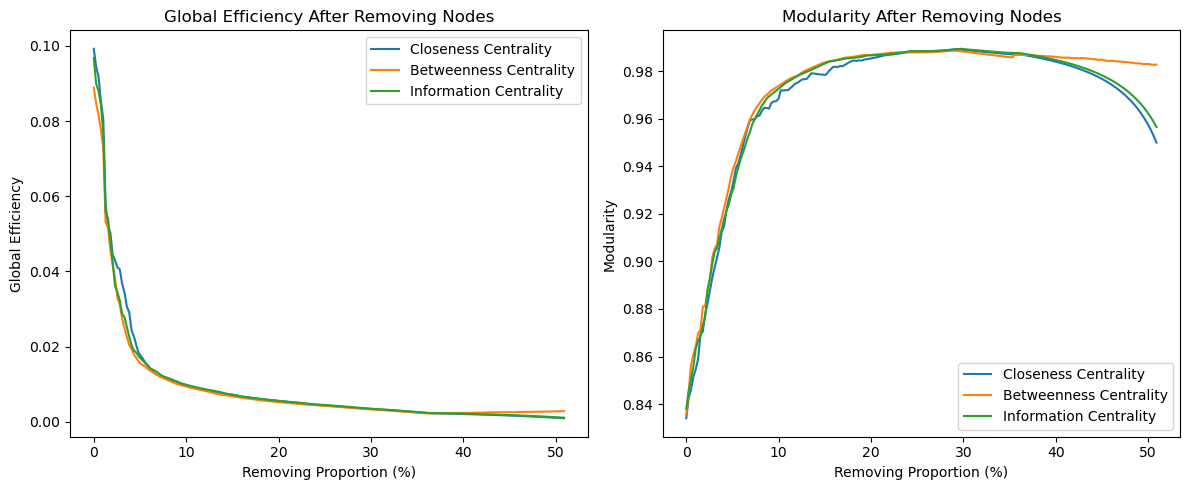

In [197]:
# create a subplots, and plot the global efficiency and modularity after removing nodes based on closeness, betweenness and information centrality. global efficiency is on the left one , and another plot for modularity

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# plot the global efficiency
ax[0].plot(DF_sequen['Removing Proportion'], DF_sequen['Closeness Global Efficiency'], label='Closeness Centrality')
ax[0].plot(DF_sequen['Removing Proportion'], DF_sequen['Betweenness Global Efficiency'], label='Betweenness Centrality')
ax[0].plot(DF_sequen['Removing Proportion'], DF_sequen['Information Global Efficiency'], label='Information Centrality')
ax[0].set_xlabel('Removing Proportion (%)')
ax[0].set_ylabel('Global Efficiency')
ax[0].set_title('Global Efficiency After Removing Nodes')
ax[0].legend()

# plot the modularity
ax[1].plot(DF_sequen['Removing Proportion'], DF_sequen['Closeness Modularity'], label='Closeness Centrality')
ax[1].plot(DF_sequen['Removing Proportion'], DF_sequen['Betweenness Modularity'], label='Betweenness Centrality')
ax[1].plot(DF_sequen['Removing Proportion'], DF_sequen['Information Modularity'], label='Information Centrality')
ax[1].set_xlabel('Removing Proportion (%)')
ax[1].set_ylabel('Modularity')
ax[1].set_title('Modularity After Removing Nodes')
ax[1].legend()

plt.tight_layout()
plt.savefig('Images/Sequen_ImpactMeasures.png', dpi=150)
plt.show()


In [ ]:
# concatenate the DF_nonseq and DF_sequen dataframes as a single dataframe, and change the column names, add dataframe's name to the columns names
DF_nonseq.columns = [f'Non-Sequential {col}' for col in DF_nonseq.columns]
DF_sequen.columns = [f'Sequential {col}' for col in DF_sequen.columns]


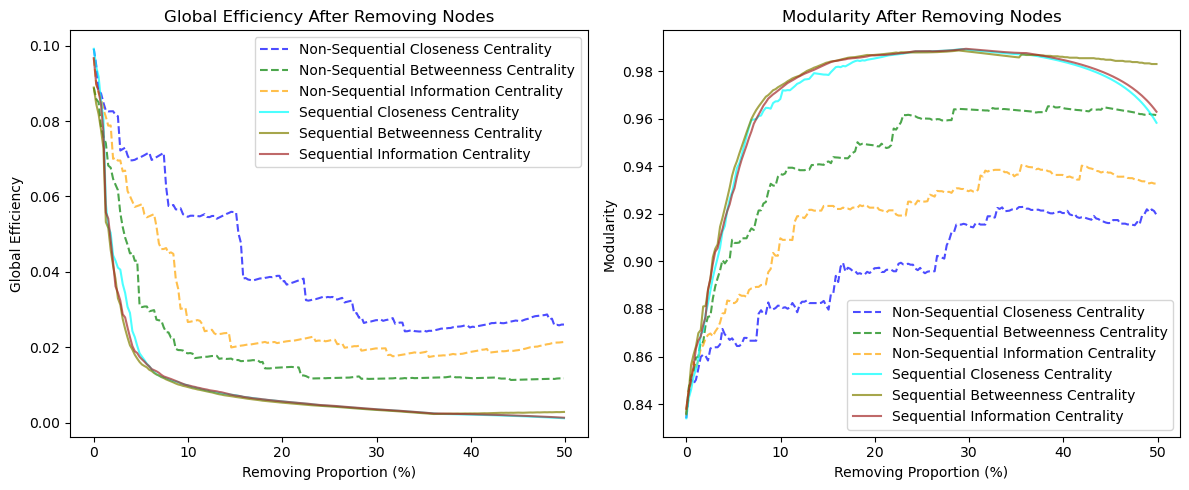

In [203]:

# plot the global efficiency and modularity after removing nodes based on closeness, betweenness and information centrality. global efficiency is on the left one , and another plot for modularity
DF_combined = pd.concat([DF_nonseq, DF_sequen], axis=1)
DF_combined['Removing Proportion'] = DF_combined.index / len(G_non_removal.nodes) * 100

# only subset the rows where the 'Removing Proportion' is less than 50
DF_combined = DF_combined[DF_combined['Removing Proportion'] <= 50]


fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# plot the global efficiency

# Non-Sequential，使用虚线（linestyle='--'）
ax[0].plot(DF_combined['Removing Proportion'], DF_combined['Non-Sequential Closeness Global Efficiency'], 
           label='Non-Sequential Closeness Centrality', linestyle='--', color='blue', alpha=0.7)
ax[0].plot(DF_combined['Removing Proportion'], DF_combined['Non-Sequential Betweenness Global Efficiency'], 
           label='Non-Sequential Betweenness Centrality', linestyle='--', color='green', alpha=0.7)
ax[0].plot(DF_combined['Removing Proportion'], DF_combined['Non-Sequential Information Global Efficiency'], 
           label='Non-Sequential Information Centrality', linestyle='--', color='orange', alpha=0.7)

# Sequential，使用实线（默认样式，但为了清晰，可以明确指定linestyle='-'）
ax[0].plot(DF_combined['Removing Proportion'], DF_combined['Sequential Closeness Global Efficiency'], 
           label='Sequential Closeness Centrality', linestyle='-', color='cyan', alpha=0.7)
ax[0].plot(DF_combined['Removing Proportion'], DF_combined['Sequential Betweenness Global Efficiency'], 
           label='Sequential Betweenness Centrality', linestyle='-', color='olive', alpha=0.7)
ax[0].plot(DF_combined['Removing Proportion'], DF_combined['Sequential Information Global Efficiency'], 
           label='Sequential Information Centrality', linestyle='-', color='brown', alpha=0.7)

ax[0].set_xlabel('Removing Proportion (%)')
ax[0].set_ylabel('Global Efficiency')
ax[0].set_title('Global Efficiency After Removing Nodes')
ax[0].legend()

# plot the modularity

# Non-Sequential，使用虚线（linestyle='--'）
ax[1].plot(DF_combined['Removing Proportion'], DF_combined['Non-Sequential Closeness Modularity'], 
           label='Non-Sequential Closeness Centrality', linestyle='--', color='blue', alpha=0.7)
ax[1].plot(DF_combined['Removing Proportion'], DF_combined['Non-Sequential Betweenness Modularity'],
            label='Non-Sequential Betweenness Centrality', linestyle='--', color='green', alpha=0.7)
ax[1].plot(DF_combined['Removing Proportion'], DF_combined['Non-Sequential Information Modularity'],
            label='Non-Sequential Information Centrality', linestyle='--', color='orange', alpha=0.7)

# Sequential，使用实线（默认样式，但为了清晰，可以明确指定linestyle='-'）
ax[1].plot(DF_combined['Removing Proportion'], DF_combined['Sequential Closeness Modularity'],
            label='Sequential Closeness Centrality', linestyle='-', color='cyan', alpha=0.7)
ax[1].plot(DF_combined['Removing Proportion'], DF_combined['Sequential Betweenness Modularity'],
            label='Sequential Betweenness Centrality', linestyle='-', color='olive', alpha=0.7)
ax[1].plot(DF_combined['Removing Proportion'], DF_combined['Sequential Information Modularity'],
            label='Sequential Information Centrality', linestyle='-', color='brown', alpha=0.7)

ax[1].set_xlabel('Removing Proportion (%)')
ax[1].set_ylabel('Modularity')
ax[1].set_title('Modularity After Removing Nodes')
ax[1].legend()


plt.tight_layout()
plt.savefig('Images/Combined_ImpactMeasures.png', dpi=150)
plt.show()

## Weighted Network

### Centrality

In [227]:
G_weighted = G.copy()

In [231]:
G_weighted.edges(data=True)

EdgeDataView([('Uxbridge', 'Hillingdon', {'length': 2144.402930418031, 'line_name': 'Piccadilly', 'flows': 7080}), ('Hillingdon', 'Ickenham', {'length': 1124.4305849099487, 'line_name': 'Piccadilly', 'flows': 8453}), ('Ickenham', 'Ruislip', {'length': 1785.6578668965587, 'line_name': 'Piccadilly', 'flows': 8984}), ('Ruislip', 'Ruislip Manor', {'length': 678.8812931512366, 'line_name': 'Piccadilly', 'flows': 9700}), ('Ruislip Manor', 'Eastcote', {'length': 1126.2177218801535, 'line_name': 'Piccadilly', 'flows': 10497}), ('Eastcote', 'Rayners Lane', {'length': 1819.3170235048165, 'line_name': 'Piccadilly', 'flows': 12414}), ('Rayners Lane', 'West Harrow', {'length': 1364.0797888709, 'line_name': 'Metropolitan', 'flows': 13802}), ('Rayners Lane', 'South Harrow', {'length': 1805.5287510484027, 'line_name': 'Piccadilly', 'flows': 5272}), ('West Harrow', 'Harrow-on-the-Hill', {'length': 1241.8463391204273, 'line_name': 'Metropolitan', 'flows': 14433}), ('Aldgate', 'Liverpool Street', {'lengt

In [232]:
# re-compute the centrality measures for the graph G and use 'distance' or 'flow' as the weight for each edge
# compute the betweenness centrality
weighted_betweenness_centrality = nx.betweenness_centrality(G_weighted, weight='length')
# compute the closeness centrality
weighted_closeness_centrality = nx.closeness_centrality(G_weighted, distance='length')
# compute the information centrality
weighted_information_centrality = nx.information_centrality(G_weighted, weight='length')


# create a dataframe to store the centrality measures

weighted_centrality_df = pd.DataFrame({'Station': list(G_weighted.nodes),
                                        'betweenness centrality': list(weighted_betweenness_centrality.values()),
                                        'closeness_centrality': list(weighted_closeness_centrality.values()),
                                        'infomation_centrality': list(weighted_information_centrality.values())})

In [233]:
weighted_centrality_df.head(5)

,Station,betweenness centrality,closeness_centrality,infomation_centrality
0,Uxbridge,0.000000,0.000029,0.242249
1,Hillingdon,0.005000,0.000031,0.253684
2,Ickenham,0.009975,0.000032,0.278641
3,Ruislip,0.014925,0.000034,0.296944
4,Ruislip Manor,0.019850,0.000035,0.358585


In [234]:
# save the weighted centrality measure to a csv file
weighted_centrality_df.to_csv('Weighted_Centrality_Measures.csv', index=False)

In [235]:


for i in range(len(weighted_centrality_df)):
    G_weighted.nodes[weighted_centrality_df['Station'][i]]['betweenness_centrality'] = weighted_centrality_df['betweenness centrality'][i]
    G_weighted.nodes[weighted_centrality_df['Station'][i]]['closeness_centrality'] = weighted_centrality_df['closeness_centrality'][i]
    G_weighted.nodes[weighted_centrality_df['Station'][i]]['infomation_centrality'] = weighted_centrality_df['infomation_centrality'][i]

In [236]:
G_weighted.nodes(data=True)

NodeDataView({'Uxbridge': {'coords': (505605.79164161877, 184156.71191985445), 'degree centrality': 0.0025, 'betweenness centrality': 0.0, 'closeness_centrality': 2.9317345713196342e-05, 'infomation_centrality': 0.24224948224546267, 'betweenness_centrality': 0.0}, 'Hillingdon': {'coords': (507544.8588852762, 185008.64550515497), 'degree centrality': 0.005, 'betweenness centrality': 0.005, 'closeness_centrality': 3.127887631262038e-05, 'infomation_centrality': 0.25368412641375426, 'betweenness_centrality': 0.005}, 'Ickenham': {'coords': (508089.8084796285, 185937.75443791418), 'degree centrality': 0.005, 'betweenness centrality': 0.009974937343358397, 'closeness_centrality': 3.241022466781989e-05, 'infomation_centrality': 0.27864137813842943, 'betweenness_centrality': 0.009974937343358397}, 'Ruislip': {'coords': (509483.21437480004, 187013.5122156188), 'degree centrality': 0.005, 'betweenness centrality': 0.014924812030075188, 'closeness_centrality': 3.4374746700684425e-05, 'infomation_

In [237]:
pos_weighted = nx.get_node_attributes(G_weighted, 'coords')

In [238]:
pos_weighted

{'Uxbridge': (505605.79164161877, 184156.71191985445),
 'Hillingdon': (507544.8588852762, 185008.64550515497),
 'Ickenham': (508089.8084796285, 185937.75443791418),
 'Ruislip': (509483.21437480004, 187013.5122156188),
 'Ruislip Manor': (510118.87368717283, 187242.51348855183),
 'Eastcote': (511171.9715447873, 187632.66808651615),
 'Rayners Lane': (512962.74657874956, 187514.3152906038),
 'West Harrow': (514165.9648772987, 188008.84933260124),
 'Aldgate': (533621.7562325703, 181218.2914789415),
 'Liverpool Street': (533125.9616962055, 181621.10750174103),
 'Baker Street': (528061.608007069, 182010.30083781155),
 'Great Portland Street': (528861.9287262575, 182179.18421714084),
 'Euston Square': (529438.4920540017, 182399.39466041088),
 "King's Cross St. Pancras": (530297.7937314082, 182968.91621423292),
 'Farringdon': (531644.3146991902, 181790.58946425727),
 'Barbican': (532072.2987083032, 181858.6164657728),
 'Moorgate': (532737.6014321152, 181642.81298841862),
 'Harrow-on-the-Hill': 

### Plotting

C:\Users\SBH\AppData\Local\Temp\ipykernel_35236\204600048.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Closeness Centrality After Standardization', shrink=0.7, pad=-0.05)


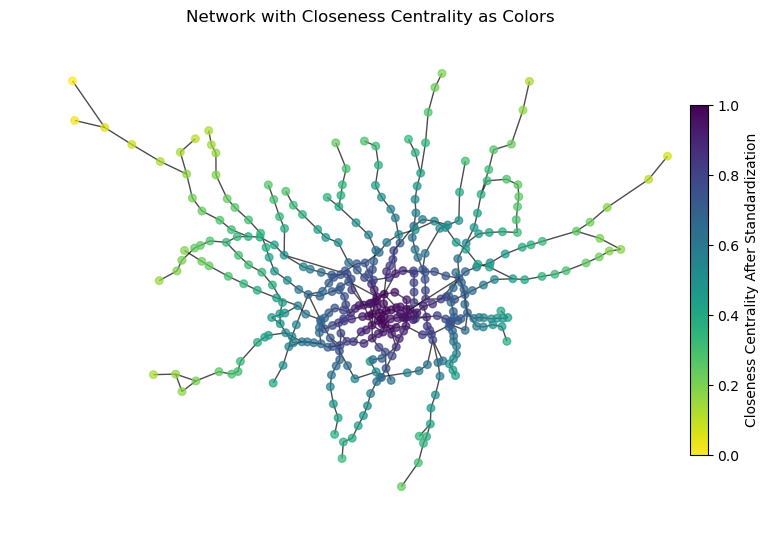

In [239]:
# map the closeness centrality to the color of the nodes
# standardize the closeness centrality values to [0, 1] interval
min_value = min(weighted_centrality_df['closeness_centrality'])
max_value = max(weighted_centrality_df['closeness_centrality'])
norm_value = [(G_weighted.nodes[node]['closeness_centrality'] - min_value) / (max_value - min_value) for node in G_weighted.nodes()]

colors = plt.cm.viridis_r(norm_value)

plt.figure(figsize=(8, 5))
nx.draw(G_weighted, pos=pos_weighted, with_labels=False, node_size=30, font_size=5, node_color=colors, alpha=0.7)

plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Closeness Centrality After Standardization', shrink=0.7, pad=-0.05)
plt.axis('off')
plt.title('Network with Closeness Centrality as Colors', fontsize=12)

# set the resolution of the plot
plt.savefig('Images/network_closeness_weighted.png', dpi=150)
plt.show()

C:\Users\SBH\AppData\Local\Temp\ipykernel_35236\914949222.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Betweenness Centrality After Standardization', shrink=0.7, pad=-0.05)


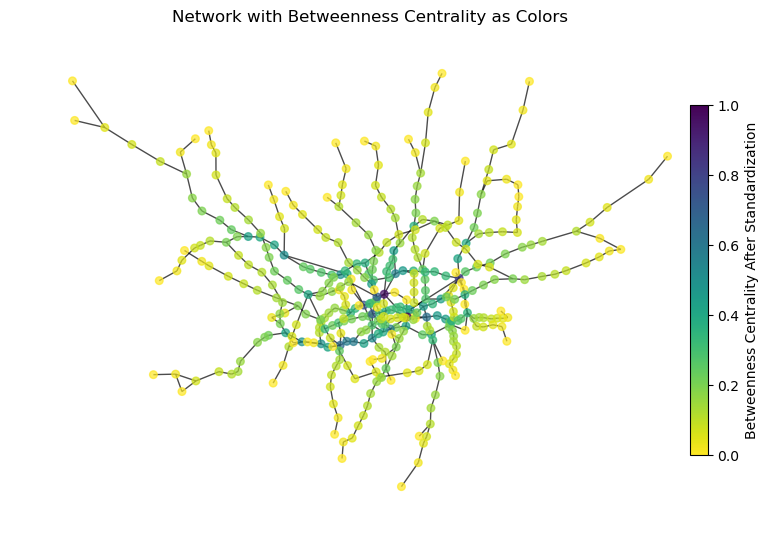

In [240]:
# map the betweenness centrality to the color of the nodes
# standardize the betweenness centrality values to [0, 1] interval
min_value = min(weighted_centrality_df['betweenness centrality'])
max_value = max(weighted_centrality_df['betweenness centrality'])
norm_value = [(G_weighted.nodes[node]['betweenness_centrality'] - min_value) / (max_value - min_value) for node in G_weighted.nodes()]

colors = plt.cm.viridis_r(norm_value)

plt.figure(figsize=(8, 5))
nx.draw(G_weighted, pos=pos_weighted, with_labels=False, node_size=30, font_size=5, node_color=colors, alpha=0.7)

plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Betweenness Centrality After Standardization', shrink=0.7, pad=-0.05)
plt.axis('off')
plt.title('Network with Betweenness Centrality as Colors', fontsize=12)

# set the resolution of the plot
plt.savefig('Images/network_betweenness_weighted.png', dpi=150)
plt.show()

C:\Users\SBH\AppData\Local\Temp\ipykernel_35236\3114637689.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Information Centrality After Standardization', shrink=0.7, pad=-0.05)


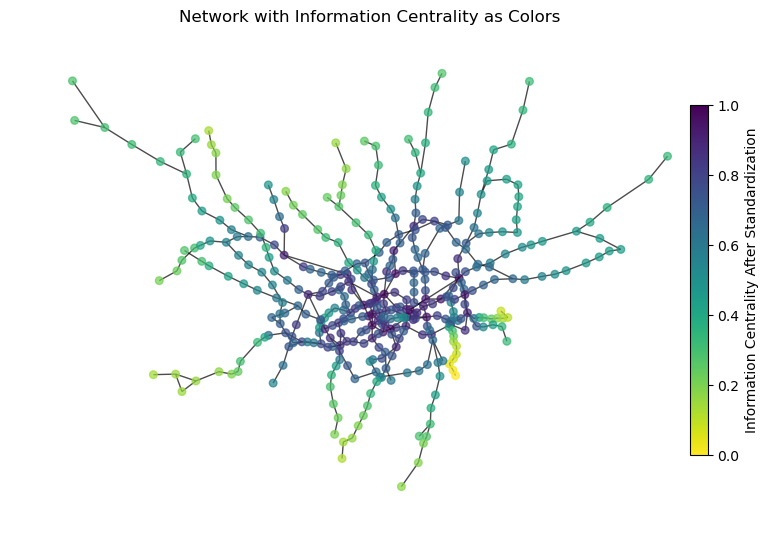

In [241]:
# map the information centrality to the color of the nodes
# standardize the information centrality values to [0, 1] interval
min_value = min(weighted_centrality_df['infomation_centrality'])
max_value = max(weighted_centrality_df['infomation_centrality'])
norm_value = [(G_weighted.nodes[node]['infomation_centrality'] - min_value) / (max_value - min_value) for node in G_weighted.nodes()]

colors = plt.cm.viridis_r(norm_value)

plt.figure(figsize=(8, 5))
nx.draw(G_weighted, pos=pos_weighted, with_labels=False, node_size=30, font_size=5, node_color=colors, alpha=0.7)

plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), orientation='vertical', label='Information Centrality After Standardization', shrink=0.7, pad=-0.05)
plt.axis('off')
plt.title('Network with Information Centrality as Colors', fontsize=12)

# set the resolution of the plot
plt.savefig('Images/network_information_weighted.png', dpi=150)
plt.show()

### Global Measures